 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path('C:/Users/piercerachel/Desktop/materials/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/whale_returns.csv')
whale_returns = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
whale_returns.isnull().sum()
#To check that there are no nulls remaining

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
csv_path2 = Path('C:/Users/piercerachel/Desktop/materials/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv(csv_path2, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [9]:
algo_returns.isnull().sum()
#To check that there are no nulls remaining

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
csv_path3 = Path('C:/Users/piercerachel/Desktop/materials/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/sp500_history.csv')
sp_close = pd.read_csv(csv_path3, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_close.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp_close.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_close["Close"] = sp_close["Close"].str.replace("$", "")
sp_close["Close"]


<ipython-input-12-3144e3267a91>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_close["Close"] = sp_close["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [13]:
sp_close["Close"] = sp_close["Close"].astype("float")

In [14]:
sp_close.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp_returns = sp_close.pct_change()
sp_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
# Drop nulls
sp_returns.isnull().sum()

Close    1
dtype: int64

In [17]:
sp_returns = sp_returns.dropna()
sp_returns.head()



,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [18]:
sp_returns.isnull().sum()
#To check that there are no nulls remaining

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns.columns = ["SP500"]
sp_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_returns, algo_returns, sp_returns], axis="columns", join="inner")
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Returns'}, xlabel='Date', ylabel='Return'>

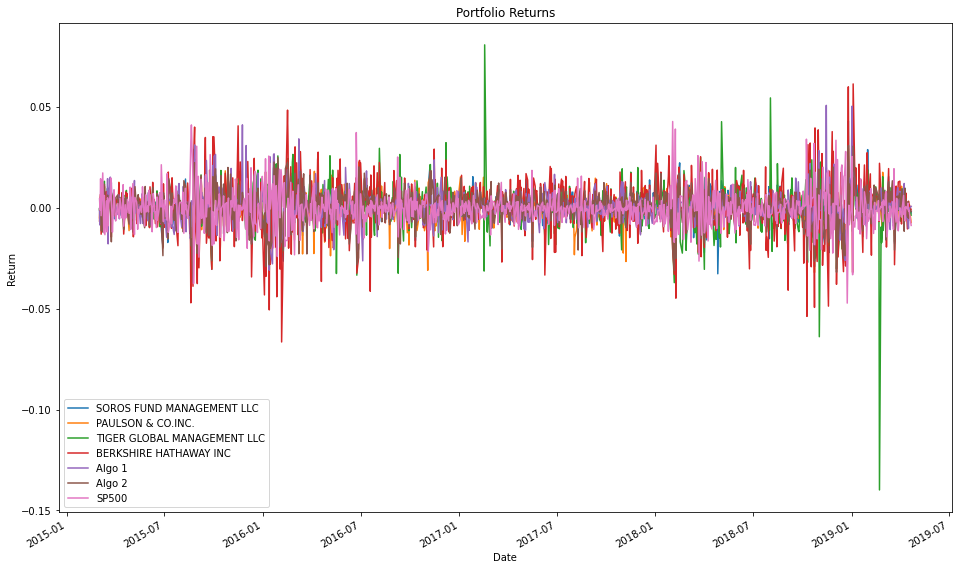

In [21]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(16,10), title="Portfolio Returns", xlabel="Date", ylabel="Return")

#### Calculate and Plot cumulative returns.

In [22]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + joined_data).cumprod()

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date', ylabel='Return'>

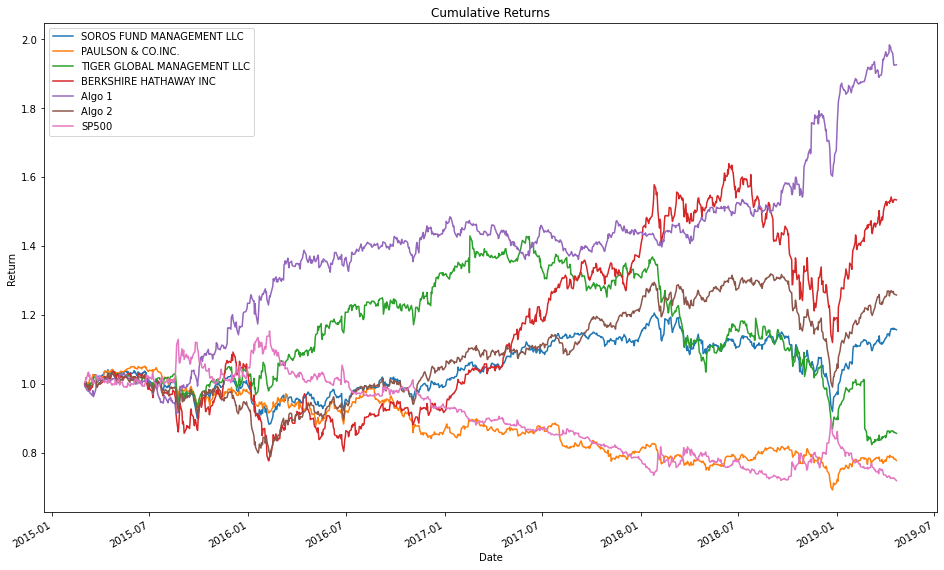

In [23]:
# Plot cumulative returns
cum_returns.plot(figsize=(16,10), title="Cumulative Returns", xlabel="Date", ylabel="Return")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Returns Box Plot'}, ylabel='Return'>

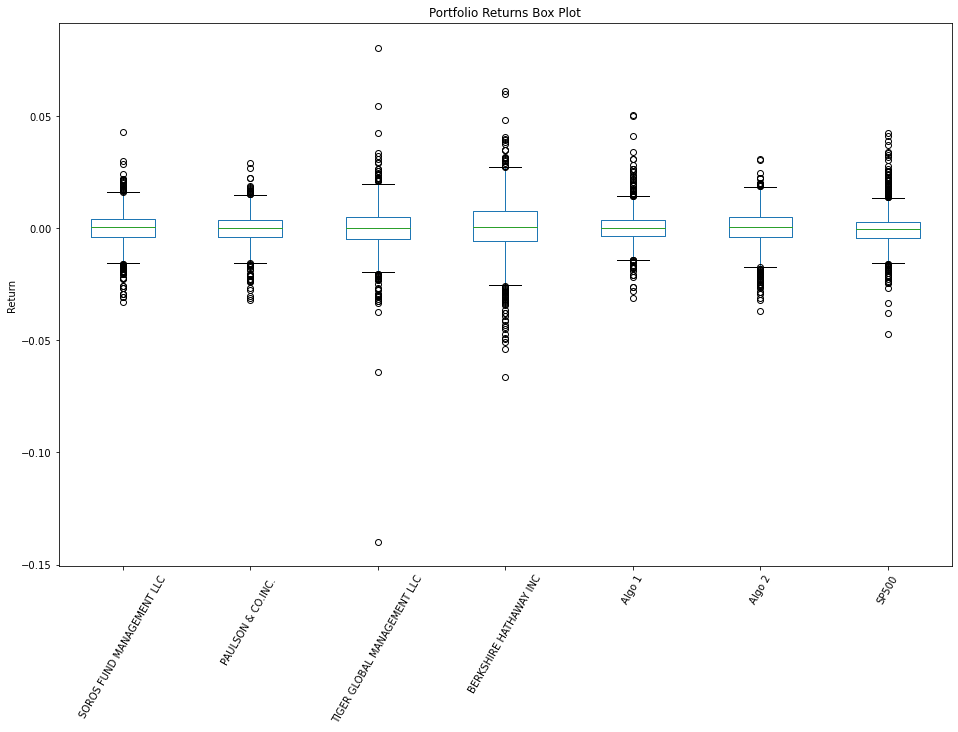

In [24]:
# Box plot to visually show risk
joined_data.plot.box(figsize=(16,10), rot=60, title="Portfolio Returns Box Plot", xlabel="Date", ylabel="Return")

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
joined_data_std = joined_data.std()
joined_data_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = joined_data['SP500'].std()
# Determine which portfolios are riskier than the S&P 500
joined_data_std > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

#### Answer: Tiger Global Mgmt (0.0109) and Berkshire Hathaway (0.0129) are riskier than the S&P500 (0.0086).

### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date', ylabel='St_Dev'>

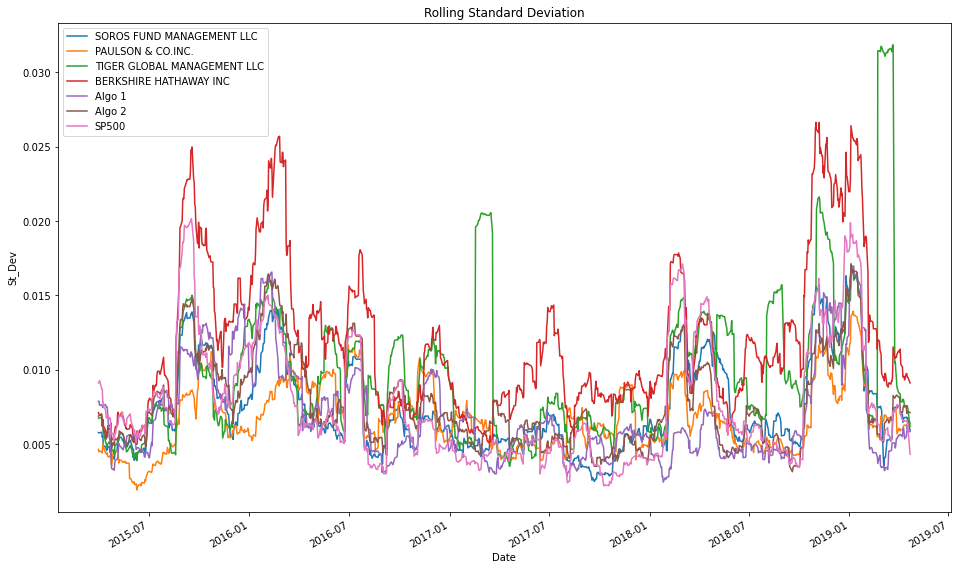

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
joined_data.rolling(window=21).std().plot(figsize=(16,10), title="Rolling Standard Deviation", xlabel="Date", ylabel="St_Dev")

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
price_correlation = joined_data.corr()



<AxesSubplot:>

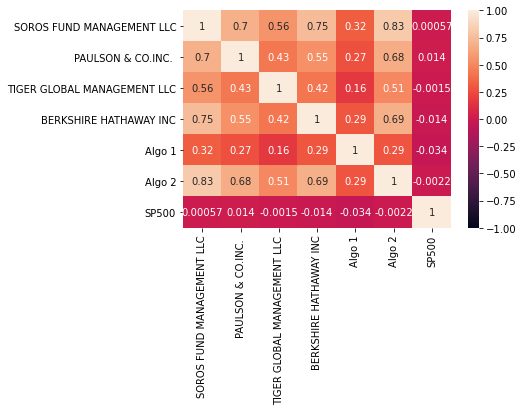

In [30]:
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [31]:
# Calculate covariance of a single portfolio

covariance = joined_data['Algo 1'].rolling(60).cov(joined_data['SP500'])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
Length: 1042, dtype: float64

In [32]:
# Calculate variance of S&P 500
variance = joined_data['SP500'].rolling(60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: SP500, Length: 1042, dtype: float64

In [33]:
# Computing beta
Algo_1_beta = covariance / variance
Algo_1_beta.head()


Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
dtype: float64

<AxesSubplot:xlabel='Date'>

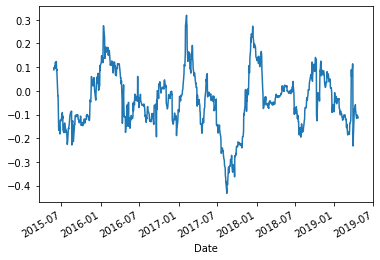

In [34]:
# # Plot beta trend
Algo_1_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

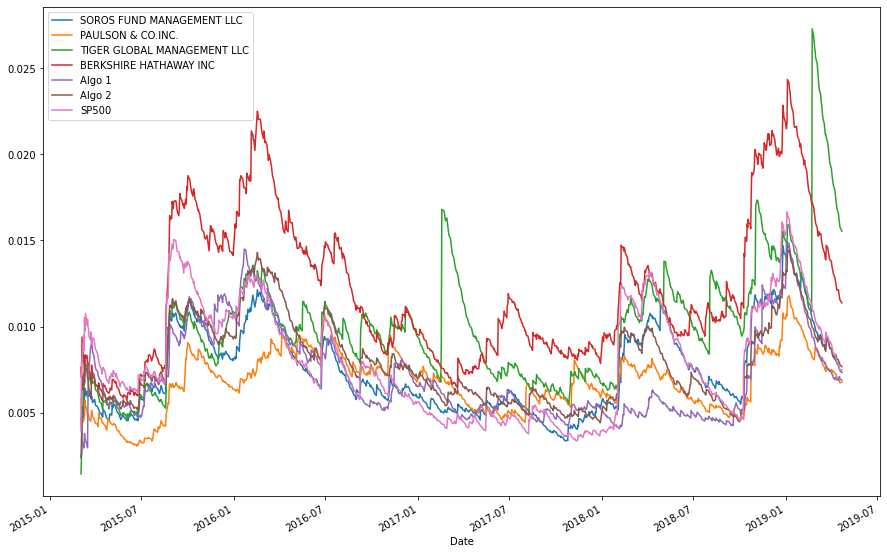

In [35]:
# Use `ewm` to calculate the rolling window

ewm_21 = joined_data.ewm(halflife=21).std()
ewm_21.plot(figsize=(15,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios

sharpe_ratios = (joined_data.mean()* 252) / (joined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

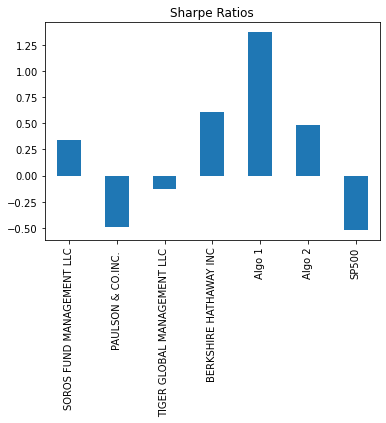

In [37]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
#### Answer:  Algo 1 outperforms all, while Algo 2 outperforms all with the exception of Berkshire.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [38]:
# Reading data from 1st stock
csv_path_goog = Path('C:/Users/piercerachel/Desktop/materials/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/goog_google_finance.csv')
goog_prices = pd.read_csv(csv_path_goog, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_prices.columns = ["GOOG"]
goog_prices.head()

,GOOG
Date,
2020-10-01,1490.09
2020-10-02,1458.42
2020-10-05,1486.02
2020-10-06,1453.44
2020-10-07,1460.29


In [39]:
# Reading data from 2nd stock
csv_path_aapl = Path('C:/Users/piercerachel/Desktop/materials/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/aapl_google_finance.csv')
aapl_prices = pd.read_csv(csv_path_aapl, index_col='Date', parse_dates=True, infer_datetime_format=True)
aapl_prices.columns = ["AAPL"]
aapl_prices.head()

,AAPL
Date,
2020-10-01,116.79
2020-10-02,113.02
2020-10-05,116.50
2020-10-06,113.16
2020-10-07,115.08


In [40]:
# Reading data from 3rd stock
csv_path_cost = Path('C:/Users/piercerachel/Desktop/materials/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/cost_google_finance.csv')
cost_prices = pd.read_csv(csv_path_cost, index_col='Date', parse_dates=True, infer_datetime_format=True)
cost_prices.columns = ["COST"]
cost_prices.head()

,COST
Date,
2020-10-01,358.46
2020-10-02,355.01
2020-10-05,358.58
2020-10-06,358.35
2020-10-07,363.02


In [41]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([goog_prices, aapl_prices, cost_prices], axis="columns", join="inner")
combined_data.head()


,GOOG,AAPL,COST
Date,,,
2020-10-01,1490.09,116.79,358.46
2020-10-02,1458.42,113.02,355.01
2020-10-05,1486.02,116.50,358.58
2020-10-06,1453.44,113.16,358.35
2020-10-07,1460.29,115.08,363.02


In [42]:
# Reset Date index

#I took a different approach and did not need this step, but if I needed this step it would have been 
#combined_data =  combined_data.reset_index()

In [50]:
# Reorganize portfolio data by having a column per symbol
#ALREADY COMPLETED ABOVE WHEN READING DATA


In [51]:
# Calculate daily returns
combined_returns = combined_data.pct_change()
combined_returns.head()



,GOOG,AAPL,COST
Date,,,
2020-10-01,NaN,NaN,NaN
2020-10-02,-0.021254,-0.032280,-0.009625
2020-10-05,0.018925,0.030791,0.010056
2020-10-06,-0.021924,-0.028670,-0.000641
2020-10-07,0.004713,0.016967,0.013032


In [52]:
# Drop NAs
combined_returns = combined_returns.dropna()


In [53]:
# Display sample data
combined_returns.head()

,GOOG,AAPL,COST
Date,,,
2020-10-02,-0.021254,-0.032280,-0.009625
2020-10-05,0.018925,0.030791,0.010056
2020-10-06,-0.021924,-0.028670,-0.000641
2020-10-07,0.004713,0.016967,0.013032
2020-10-08,0.017558,-0.000956,0.005702


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [54]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = combined_returns.dot(weights)
weighted_returns.head()

Date
2020-10-02   -0.021053
2020-10-05    0.019924
2020-10-06   -0.017078
2020-10-07    0.011571
2020-10-08    0.007435
dtype: float64

In [55]:
# Display sample data
weighted_returns.head()

Date
2020-10-02   -0.021053
2020-10-05    0.019924
2020-10-06   -0.017078
2020-10-07    0.011571
2020-10-08    0.007435
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [60]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([combined_returns, weighted_returns], axis="columns", join="inner")
combined_portfolios.columns =["GOOG", "AAPL", "COST", "WEIGHTED"]
combined_portfolios.head()


,GOOG,AAPL,COST,WEIGHTED
Date,,,,
2020-10-02,-0.021254,-0.032280,-0.009625,-0.021053
2020-10-05,0.018925,0.030791,0.010056,0.019924
2020-10-06,-0.021924,-0.028670,-0.000641,-0.017078
2020-10-07,0.004713,0.016967,0.013032,0.011571
2020-10-08,0.017558,-0.000956,0.005702,0.007435


In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios = combined_portfolios.dropna()
combined_portfolios.head()

,GOOG,AAPL,COST,WEIGHTED
Date,,,,
2020-10-02,-0.021254,-0.032280,-0.009625,-0.021053
2020-10-05,0.018925,0.030791,0.010056,0.019924
2020-10-06,-0.021924,-0.028670,-0.000641,-0.017078
2020-10-07,0.004713,0.016967,0.013032,0.011571
2020-10-08,0.017558,-0.000956,0.005702,0.007435


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the annualized `std`

combined_portfolios_std = combined_portfolios.std()
combined_portfolios_std



GOOG        0.015650
AAPL        0.017643
COST        0.011150
WEIGHTED    0.011957
dtype: float64

In [68]:

annualized_std1 = combined_portfolios_std * np.sqrt(252)
annualized_std1.head()

GOOG        0.248432
AAPL        0.280075
COST        0.176996
WEIGHTED    0.189812
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date', ylabel='St_Dev'>

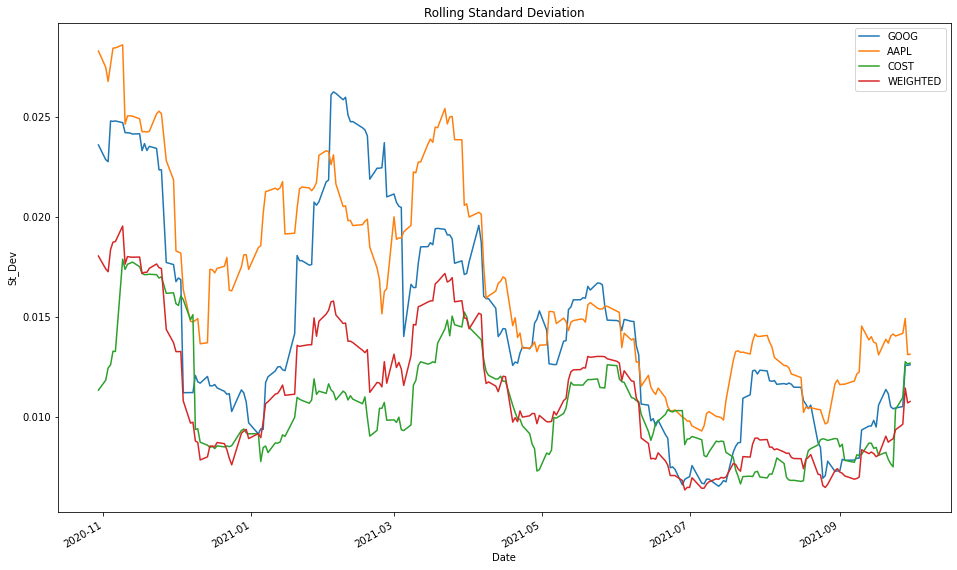

In [72]:
# Calculate rolling standard deviation
# Plot rolling standard deviation

combined_portfolios.rolling(window=21).std().plot(figsize=(16,10), title="Rolling Standard Deviation", xlabel="Date", ylabel="St_Dev")

### Calculate and plot the correlation

In [73]:
# Calculate and plot the correlation
price_correlation2 = combined_portfolios.corr()



<AxesSubplot:>

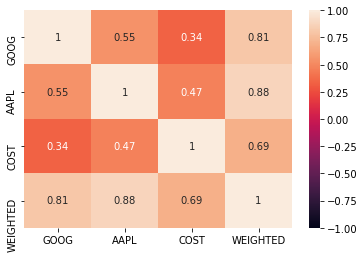

In [74]:
sns.heatmap(price_correlation2, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [78]:
# Calculate and plot Beta
covariance2 = combined_portfolios['WEIGHTED'].rolling(60).cov(joined_data['SP500'])
covariance2

Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
              ..
2021-09-24   NaN
2021-09-27   NaN
2021-09-28   NaN
2021-09-29   NaN
2021-09-30   NaN
Length: 1293, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios1 = (combined_portfolios.mean()* 252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios1

GOOG        2.475698
AAPL        0.827481
COST        1.370857
WEIGHTED    1.913183
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

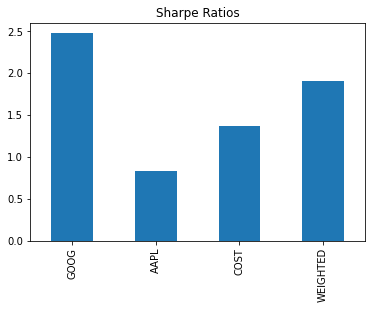

In [80]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

#### Answer: My portfolio outperforms AAPL and COST, but not GOOG.